In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper # my function that i added

In [2]:
sns.set_theme()
sns.set_context('notebook')
sns.set_palette('viridis')

In [3]:
hous_df = pd.read_csv('Ames_Housing_Price_Data.csv', 
                      index_col='PID', low_memory=False)

In [4]:
len(hous_df)

2580

In [5]:
## Choosing 'PID' as index creates an index with some duplicates.
set(hous_df.index.duplicated())

{False, True}

In [6]:
## Duplicates in index not necessarily a problem, but for the time being let's use a new sequential index.
hous_df.reset_index(inplace=True,drop=True)
hous_df = hous_df.drop('Unnamed: 0', axis=1) # moved here to remove duplicates.

# added the removal of duplicates
hous_df.drop_duplicates(inplace=True)


In [7]:
len(hous_df)

2579

In [8]:
## Landmrk neighborhood gives stratified sampling a problem because there is only one property.
hous_df['Neighborhood'].value_counts()

NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     92
IDOTRR      76
NoRidge     67
Timber      54
StoneBr     43
SWISU       42
ClearCr     40
MeadowV     34
BrDale      29
Blmngtn     23
Veenker     23
NPkVill     22
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [9]:
hous_df[hous_df['Neighborhood']=='Landmrk']

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1204,1320,137000,160,RH,NaN,3612,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal


In [10]:
## For the moment, I will handle this by insisting it is in the train data. This is achieved by removing it, splitting,
## then adding it to train.

In [11]:
hous_no_Landmrk = hous_df[hous_df['Neighborhood']!='Landmrk']

In [12]:
## The missing index causes problems for the stratified sampling.
hous_no_Landmrk.reset_index(inplace=True, drop=True)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

In [14]:
_ = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)
split = _.split(hous_no_Landmrk, hous_no_Landmrk['Neighborhood'])

In [15]:
for train_index, test_index in split:
    hous_train = hous_no_Landmrk.loc[train_index].reset_index(drop=True)
    hous_test = hous_no_Landmrk.loc[test_index].reset_index(drop=True)

In [16]:
## Let's look at the distributions before adding Landmrk to train.
df_dict = {'All':hous_no_Landmrk, 'Train':hous_train, 'Test':hous_test}

In [17]:
df_dict.keys()

dict_keys(['All', 'Train', 'Test'])

In [18]:
plot_order = np.sort(hous_no_Landmrk['Neighborhood'].unique())

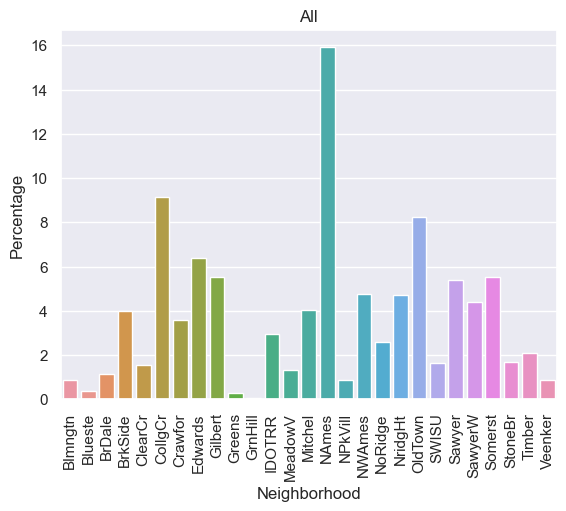

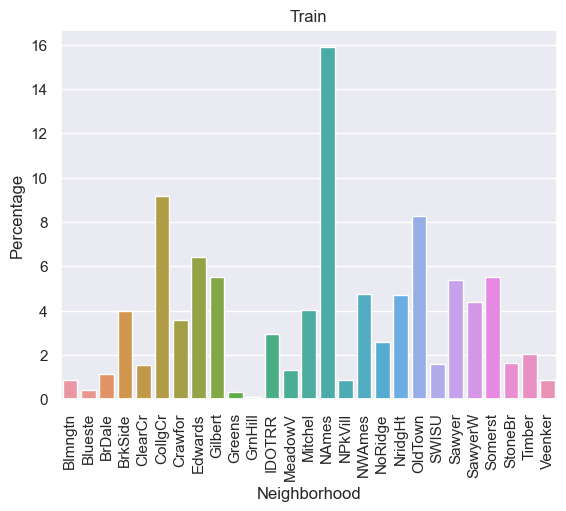

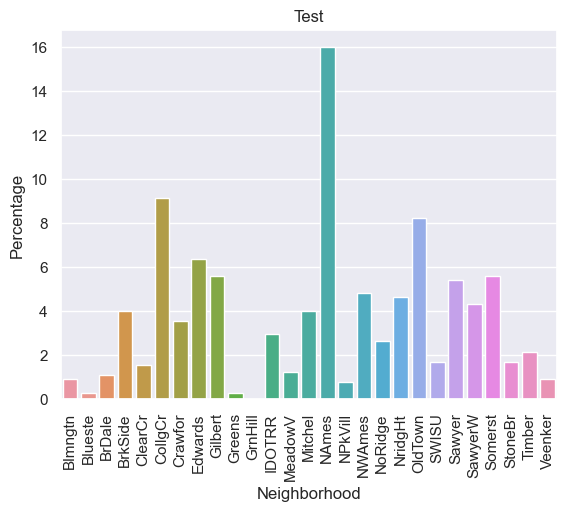

In [19]:
for label in df_dict.keys():
    data = df_dict[label]
    _=sns.barplot(x='Neighborhood', y='SalePrice', data=data, 
                            estimator=lambda y: len(y) / len(data) * 100, order=plot_order)
    _.tick_params(axis='x', rotation=90)
    _.set(ylabel='Percentage', title=label)
    plt.show()

In [20]:
## Just in case...
for label in df_dict.keys():
    print(df_dict[label].shape)

(2578, 80)
(1933, 80)
(645, 80)


In [21]:
hous_train.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1080,136000,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,...,130,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1,2392,386250,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1710,240000,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,...,180,0,NaN,NaN,NaN,0,4,2009,WD,Normal
3,630,81000,180,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,1771,115000,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal


In [22]:
hous_test.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2073,210000,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1,1028,115000,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
3,1935,197900,60,RL,NaN,12384,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [23]:
## Now we add the Landmrk row to the training data.
hous_train = pd.concat([hous_train, hous_df[hous_df['Neighborhood']=='Landmrk']]).reset_index(drop=True)

In [24]:
function_train,function_test = helper.stratified_split(hous_df,'Neighborhood')

In [25]:
hous_train.shape

(1934, 80)

In [26]:
function_train.shape

(1934, 80)

In [27]:
hous_train.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1080,136000,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,...,130,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1,2392,386250,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1710,240000,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,...,180,0,NaN,NaN,NaN,0,4,2009,WD,Normal
3,630,81000,180,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,1771,115000,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal


In [28]:
function_train.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1080,136000,20,RL,75.0,9464,Pave,NaN,Reg,Lvl,...,130,0,NaN,NaN,NaN,0,6,2008,WD,Normal
1,2392,386250,20,RL,103.0,13472,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2,1710,240000,20,RL,43.0,12118,Pave,NaN,IR1,Lvl,...,180,0,NaN,NaN,NaN,0,4,2009,WD,Normal
3,630,81000,180,RM,21.0,1890,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal
4,1771,115000,20,RL,100.0,21750,Pave,NaN,Reg,Lvl,...,0,0,NaN,GdPrv,NaN,0,11,2009,WD,Normal


In [29]:
function_test.shape

(645, 80)

In [30]:
hous_test.shape

(645, 80)

In [31]:
function_test.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2073,210000,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1,1028,115000,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
3,1935,197900,60,RL,NaN,12384,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [32]:
hous_test.head()

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,2073,210000,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1,1028,115000,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,1362,143000,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
3,1935,197900,60,RL,NaN,12384,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,2110,244000,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [33]:
# my helper function split looks to do the same split as your function. which makes sense.